In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
import gensim
import re

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# You'll probably need to download some nltk packages.
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The URLs below point to XLSX files containing tweets from 2022 from the following Twitter accounts:
- [@TheBeaverton](https://twitter.com/TheBeaverton)
- [@BillNye](https://twitter.com/BillNye) (Bill Nye)
- [@GeorgeTakei](https://twitter.com/GeorgeTakei) (George Takei)
- [@MeCookieMonster](https://twitter.com/MeCookieMonster) (Cookie Monster)
- [@neiltyson](https://twitter.com/neiltyson) (Neil deGrasse Tyson)
- [@StephenKing](https://twitter.com/StephenKing) (Stephen King)
- [@22_Minutes](https://twitter.com/22_Minutes) (This Hour Has 22 Minutes)

*If you want local copies of these data files, you can download each by Ctrl+clicking (Windows) or Command+clicking (Mac) the links below.*

In [ ]:
beaverton_url = 'https://drive.google.com/uc?export=download&id=173t6vMYcbSED81IOmg0MbhHsrSFSiF21'
billnye_url = 'https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N'
georgetakei_url = 'https://drive.google.com/uc?export=download&id=1_Ck9S2aW9cBQQrqoTiNLRmvRu4WvPn8y'
cookiemonster_url = 'https://drive.google.com/uc?export=download&id=10Av-HVklZA4Su3TcvSpxU6nS8At9mJ05'
neiltyson_url = 'https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM'
stephenking_url = 'https://drive.google.com/uc?export=download&id=1Oq2pUCv0d7x4tDKX1E-3hgdSAuXcZtVU'
twentytwo_minutes_url = 'https://drive.google.com/uc?export=download&id=1B2zwAJYdw_9skXAFbn7QIs6uyIikje5W'

## Q1. What does each of the accounts usually tweet about?


Analyzing tweets for: TheBeaverton


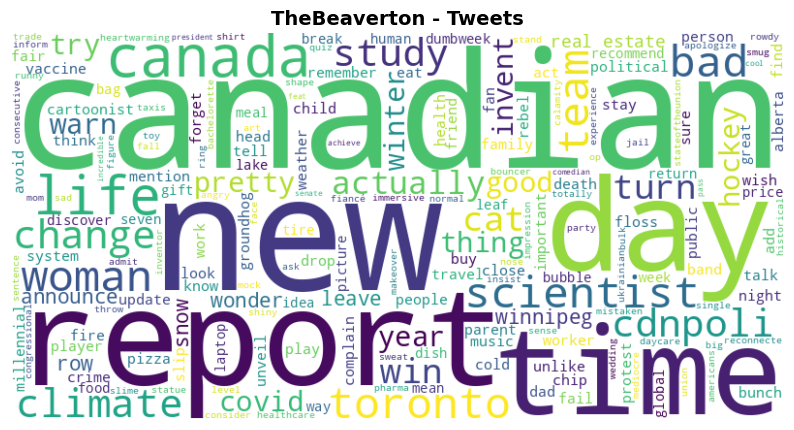


TheBeaverton (@TheBeaverton)
    • Themes: canadian, new, report.
    • Frequent Words: canadian, new, report, day, time, canada, life, scientist, bad, team.
    • Analysis: TheBeaverton frequently tweets about canadian, new, report, engaging discussions on canadian, new, report, day, time, canada, life, scientist, bad, team.


Analyzing tweets for: BillNye


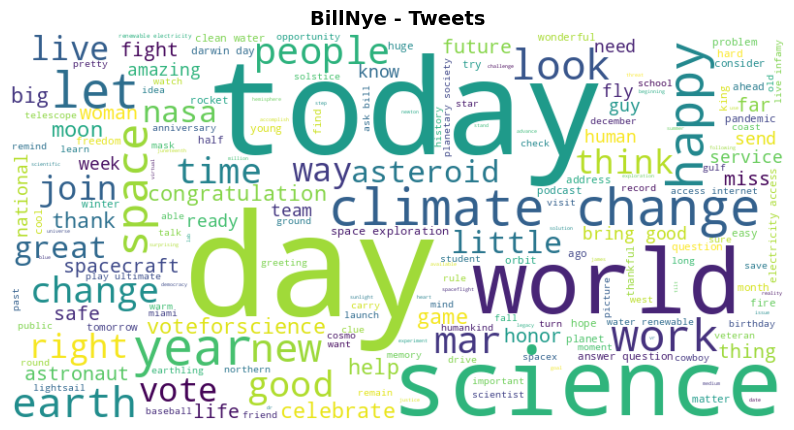


BillNye (@BillNye)
    • Themes: day, change, today.
    • Frequent Words: day, change, today, science, world, climate, year, space, happy, let.
    • Analysis: BillNye frequently tweets about day, change, today, engaging discussions on day, change, today, science, world, climate, year, space, happy, let.


Analyzing tweets for: GeorgeTakei


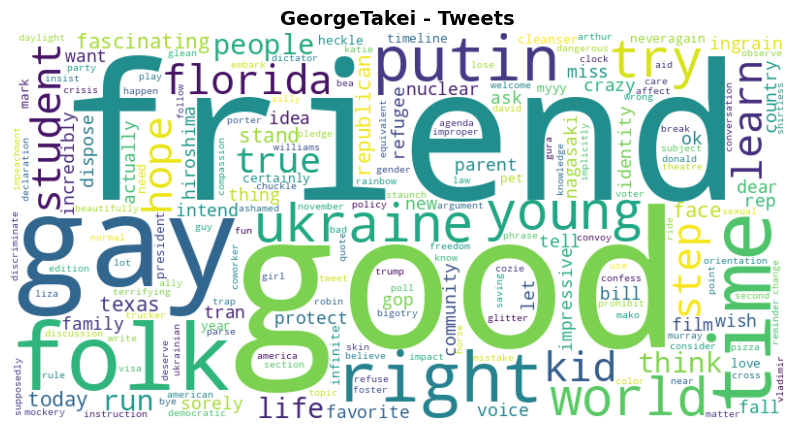


GeorgeTakei (@GeorgeTakei)
    • Themes: good, friend, gay.
    • Frequent Words: good, friend, gay, folk, time, right, putin, ukraine, world, young.
    • Analysis: GeorgeTakei frequently tweets about good, friend, gay, engaging discussions on good, friend, gay, folk, time, right, putin, ukraine, world, young.


Analyzing tweets for: CookieMonster


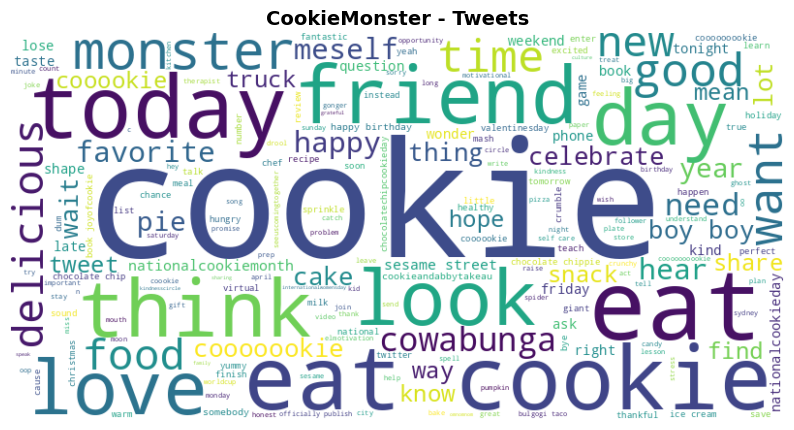


CookieMonster (@CookieMonster)
    • Themes: cookie, eat, today.
    • Frequent Words: cookie, eat, today, friend, think, look, day, love, monster, want.
    • Analysis: CookieMonster often tweets about food, particularly cookie, eat, today, friend, think, look, day, love, monster, want.


Analyzing tweets for: NeilTyson


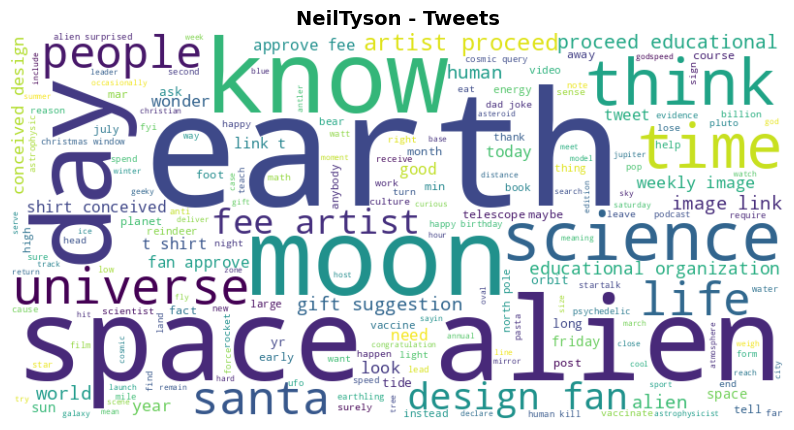


NeilTyson (@NeilTyson)
    • Themes: alien, earth, space.
    • Frequent Words: alien, earth, space, moon, day, know, science, think, time, universe.
    • Analysis: NeilTyson focuses on scientific discussions, covering topics like alien, earth, space, moon, day, know, science, think, time, universe.


Analyzing tweets for: StephenKing


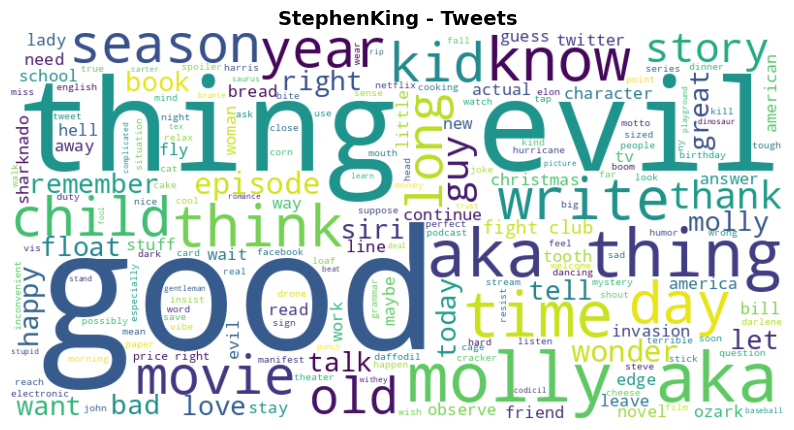


StephenKing (@StephenKing)
    • Themes: thing, molly, evil.
    • Frequent Words: thing, molly, evil, good, aka, get, know, go, write, think.
    • Analysis: StephenKing frequently tweets about thing, molly, evil, engaging discussions on thing, molly, evil, good, aka, get, know, go, write, think.


Analyzing tweets for: 22Minutes


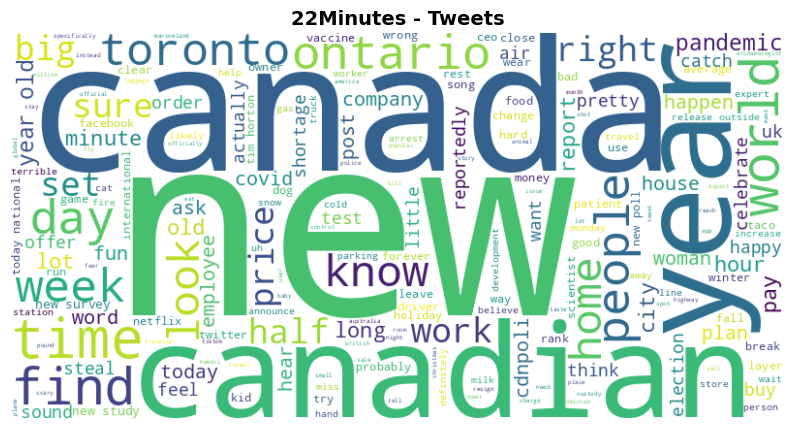


22Minutes (@22Minutes)
    • Themes: new, say, year.
    • Frequent Words: new, say, year, canada, canadian, go, time, old, get, day.
    • Analysis: 22Minutes frequently tweets about new, say, year, engaging discussions on new, say, year, canada, canadian, go, time, old, get, day.



In [ ]:
import requests
import spacy
import re
from io import BytesIO
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

#spaCy NLP model
nlp = spacy.load("en_core_web_sm")

#stopwords from multiple languages
from spacy.lang.en.stop_words import STOP_WORDS as EN_STOPWORDS
from spacy.lang.fr.stop_words import STOP_WORDS as FR_STOPWORDS
from spacy.lang.es.stop_words import STOP_WORDS as ES_STOPWORDS
from spacy.lang.de.stop_words import STOP_WORDS as DE_STOPWORDS
from spacy.lang.it.stop_words import STOP_WORDS as IT_STOPWORDS
from spacy.lang.pt.stop_words import STOP_WORDS as PT_STOPWORDS

# Custom Stopwords
custom_stopwords = {"dat", "dis", "nom", "gonna", "wanna", "lemme", "tho", "cuz", "ain't",
                    "nah", "yea", "bruh", "fam", "yo", "hmm", "rt", "amp", "co", "http", "www", "oh", "om"}

# Merge stopwords
stop_words = EN_STOPWORDS | FR_STOPWORDS | ES_STOPWORDS | DE_STOPWORDS | IT_STOPWORDS | PT_STOPWORDS | STOPWORDS | custom_stopwords

#URLs
file_urls = {
    "TheBeaverton": "https://drive.google.com/uc?export=download&id=173t6vMYcbSED81IOmg0MbhHsrSFSiF21",
    "BillNye": "https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N",
    "GeorgeTakei": "https://drive.google.com/uc?export=download&id=1_Ck9S2aW9cBQQrqoTiNLRmvRu4WvPn8y",
    "CookieMonster": "https://drive.google.com/uc?export=download&id=10Av-HVklZA4Su3TcvSpxU6nS8At9mJ05",
    "NeilTyson": "https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM",
    "StephenKing": "https://drive.google.com/uc?export=download&id=1Oq2pUCv0d7x4tDKX1E-3hgdSAuXcZtVU",
    "22Minutes": "https://drive.google.com/uc?export=download&id=1B2zwAJYdw_9skXAFbn7QIs6uyIikje5W"
}

def process_text(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

def download_file(url):
    response = requests.get(url)
    response.raise_for_status()
    return BytesIO(response.content)

def generate_analysis(account_name, themes, frequent_words):
    if "science" in themes or "space" in themes:
        return f"{account_name} focuses on scientific discussions, covering topics like {frequent_words}."
    elif "politics" in themes or "news" in themes:
        return f"{account_name} shares opinions on current affairs, highlighting {frequent_words}."
    elif "cookie" in themes or "eat" in themes:
        return f"{account_name} often tweets about food, particularly {frequent_words}."
    elif "horror" in themes or "story" in themes:
        return f"{account_name} discusses storytelling, suspense, and horror elements, featuring {frequent_words}."
    else:
        return f"{account_name} frequently tweets about {themes}, engaging discussions on {frequent_words}."

#analyze tweets
def analyze_tweets(account_name, file_url, max_rows=500):
    try:
        file_obj = download_file(file_url)
        df = pd.read_excel(file_obj, sheet_name=0, engine="openpyxl", usecols=["tweet-text"], nrows=max_rows)
        df["processed"] = df["tweet-text"].astype(str).apply(process_text)
        all_words = [word for words in df["processed"] for word in words]
        word_counts = Counter(all_words)
        top_words = word_counts.most_common(10)

        #Word Cloud
        wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color="white").generate(" ".join(all_words))
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{account_name} - Tweets", fontsize=14, fontweight="bold")
        plt.show()

        #most common words
        top_words_text = ", ".join([word for word, _ in top_words])
        themes = ", ".join([word for word, _ in top_words[:3]])

        tweet_analysis = generate_analysis(account_name, themes, top_words_text)

        formatted_output = f"""
{account_name} (@{account_name})
    • Themes: {themes}.
    • Frequent Words: {top_words_text}.
    • Analysis: {tweet_analysis}
"""
        print(formatted_output)
        return df

    except Exception as e:
        print(f"Error processing {account_name}: {e}")
        return None

for account, url in file_urls.items():
    print(f"\nAnalyzing tweets for: {account}")
    analyze_tweets(account, url)

### **Conclusion:**

1.   The Beaverton's tweets mostly focus on Canadian news, reports, and daily life, often with a satirical and critical perspective.
2.   Bill Nye's tweets emphasize science, climate change, and global events, frequently highlighting the need for progress and innovation.
3. George Takei's tweets often highlight LGBTQ+ topics, friendships, and global affairs, blending advocacy with cultural and political commentary.
4. Cookie Monster's tweets center around a love for cookies, food, and joyful interactions, often shared in a fun and whimsical way.
5. Neil deGrasse Tyson's tweets revolve around space, Earth, and the cosmos, offering scientific insights and inspiring curiosity about the universe.
6. Stephen King's tweets often blend humor, writing insights, and references to his dog, Molly, while occasionally touching on themes of horror and the macabre.
7. 22 Minutes' tweets cover Canadian news, current events, and satire, often with a humorous take on politics and society.

# Q2 Comparison of Two Accounts

####Pick any pair of accounts and compare them. In what ways is their Twitter behaviour and content similar/different?

In [ ]:
import nltk
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
billnye_url=pd.read_excel("https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N")
neiltyson_url=pd.read_excel('https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM')


In [ ]:
import spacy
from spacy import displacy
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def preprocess(text):
    doc = nlp(text)
    return [token.lemma_.lower() for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha]  #prepprocs for stop words, punctuations and alphanumeric characters

neiltyson_url['processed'] = neiltyson_url['tweet-text'].apply(preprocess)
billnye_url['processed'] = billnye_url['tweet-text'].apply(preprocess)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Average Sentiment Scores:
Neil Tyson: 0.16 (Positive)
Bill Nye: 0.37 (Positive)



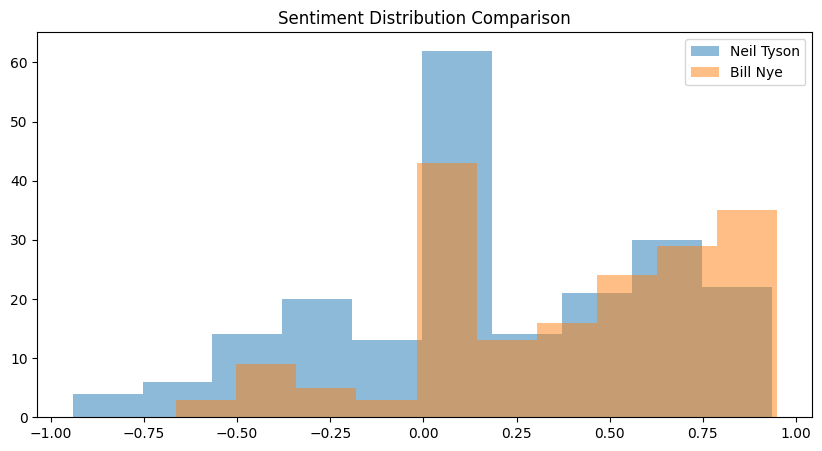

In [ ]:
#individual sia score
#sia = SentimentIntensityAnalyzer()
#for tweet in billnye_url['tweet-text']:
#    print(sia.polarity_scores(tweet))


#setniment
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sia.polarity_scores(text)['compound']    #['compound'] so it is easier to get overall mean calcualtion and easir to interpret

neiltyson_url['sentiment'] = neiltyson_url['tweet-text'].apply(get_sentiment)
billnye_url['sentiment'] = billnye_url['tweet-text'].apply(get_sentiment)

neil_sentiment = neiltyson_url['sentiment'].mean()
bill_sentiment = billnye_url['sentiment'].mean()

def get_sentiment_label(score):
    return "Positive" if score >= 0 else "Negative"

print("Average Sentiment Scores:")
print(f"Neil Tyson: {neil_sentiment:.2f} ({get_sentiment_label(neil_sentiment)})")
print(f"Bill Nye: {bill_sentiment:.2f} ({get_sentiment_label(bill_sentiment)})\n")


plt.figure(figsize=(10,5))
plt.hist(neiltyson_url['sentiment'], alpha=0.5, label='Neil Tyson')
plt.hist(billnye_url['sentiment'], alpha=0.5, label='Bill Nye')
plt.title("Sentiment Distribution Comparison")
plt.legend()
plt.show()

### **Sentiment Analysis**:

Average Sentiment	0.16 (Positive)for neil and 	0.37 (Positive) for bill
Distribution	Wider spread (-0.5 to 0.75) for neil and	Concentrated in positive range (0.25–0.75) for bill

Neil: Neutral-to-positive tone, likely due to factual astronomical content (e.g., "The moon’s gravitational pull affects Earth’s tides").

Bill: Stronger positive sentiment, driven by motivational language (e.g., "Let’s fight climate change today!").

In [ ]:
#ner
def analyze_entities(text, title="Text Analysis"):
    doc = nlp(text)

    # entity details
    print(f"\n{title} - Entity Recognition:")
    for ent in doc.ents:
        print(f"{ent.text:20} {ent.start_char:3}-{ent.end_char:3} {ent.label_:10} ({spacy.explain(ent.label_)})")

    displacy.render(doc, style="ent", jupyter=True)
    #iob
    print("\nIOB Scheme Tags:")
    print([(token.text, token.ent_iob_, token.ent_type_) for token in doc])

neil_example_tweet = neiltyson_url['tweet-text'].sample(1).values[0]   # iused .smaple to get random tweets and not specific tweets
analyze_entities(neil_example_tweet, "Neil deGrasse Tyson Tweet Example")

billnye_example_tweet = billnye_url['tweet-text'].sample(1).values[0]      # i used .sample to get random tweets and not specific tweets
analyze_entities(billnye_example_tweet, "Bill Nye Tweet Example")


Neil deGrasse Tyson Tweet Example - Entity Recognition:
Easter                51- 57 ORG        (Companies, agencies, institutions, etc.)
the holiest day       59- 74 DATE       (Absolute or relative dates or periods)
Christian             82- 91 NORP       (Nationalities or religious or political groups)
Jesus                136-141 PERSON     (People, including fictional)
Bunny Rabbits        198-211 PERSON     (People, including fictional)
Chicken              249-256 PERSON     (People, including fictional)



IOB Scheme Tags:
[('Done', 'O', ''), ('it', 'O', ''), ('many', 'O', ''), ('times', 'O', ''), (',', 'O', ''), ('but', 'O', ''), ('always', 'O', ''), ('thought', 'O', ''), ('it', 'O', ''), ('odd', 'O', ''), ('that', 'O', ''), ('Easter', 'B', 'ORG'), (',', 'O', ''), ('the', 'B', 'DATE'), ('holiest', 'I', 'DATE'), ('day', 'I', 'DATE'), ('on', 'O', ''), ('the', 'O', ''), ('Christian', 'B', 'NORP'), ('calendar', 'O', ''), (',', 'O', ''), ('commemorating', 'O', ''), ('the', 'O', ''), ('resurrection', 'O', ''), ('of', 'O', ''), ('Jesus', 'B', 'PERSON'), (',', 'O', ''), ('is', 'O', ''), ('commonly', 'O', ''), ('celebrated', 'O', ''), ('by', 'O', ''), ('eating', 'O', ''), ('chocolate', 'O', ''), ('effigies', 'O', ''), ('of', 'O', ''), ('Bunny', 'B', 'PERSON'), ('Rabbits', 'I', 'PERSON'), ('and', 'O', ''), ('boiling', 'O', ''), (',', 'O', ''), ('decorating', 'O', ''), (',', 'O', ''), ('then', 'O', ''), ('hiding', 'O', ''), ('Chicken', 'B', 'PERSON'), ('embryos', 'O', ''), ('from', 'O', ''), ('ch


IOB Scheme Tags:
[('My', 'O', ''), ('great', 'O', ''), ('grandmother', 'O', ''), ('is', 'O', ''), ('in', 'O', ''), ('this', 'O', ''), ('pic', 'O', ''), ('somewhere', 'O', ''), ('.', 'O', ''), ('She', 'O', ''), ('marched', 'O', ''), ('in', 'O', ''), ('1913', 'B', 'DATE'), ('.', 'O', ''), ('My', 'O', ''), ('mother', 'O', ''), ('served', 'O', ''), ('in', 'O', ''), ('WW', 'B', 'EVENT'), ('II', 'I', 'EVENT'), ('and', 'O', ''), ('marched', 'O', ''), ('in', 'O', ''), ('an', 'O', ''), ('ERA', 'O', ''), ('parade', 'O', ''), ('.', 'O', ''), ('I', 'O', ''), ('do', 'O', ''), ('my', 'O', ''), ('best', 'O', ''), ('to', 'O', ''), ('honor', 'O', ''), ('these', 'O', ''), ('women', 'O', ''), ('every', 'O', ''), ('day', 'O', ''), (',', 'O', ''), ('today', 'B', 'DATE'), ('especially', 'O', ''), ('.', 'O', ''), ('For', 'O', ''), ('women', 'O', ''), ('of', 'O', ''), ('the', 'O', ''), ('world', 'O', ''), (',', 'O', ''), ('the', 'O', ''), ('best', 'O', ''), ('is', 'O', ''), ('still', 'O', ''), ('ahead', 'O',

In [ ]:
from collections import Counter

def get_top_words_from_processed(df, account_name, n=10):
    all_words = [word for sublist in df['processed'] for word in sublist]

    counter = Counter(all_words)
    top_words = counter.most_common(n)

    print(f"\n{account_name} - Top {n} Words:")
    for word, count in top_words:
        print(f"{word:15} {count}")
    return top_words

# Get results using preprocessed data
neil_top = get_top_words_from_processed(neiltyson_url, "Neil deGrasse Tyson")
bill_top = get_top_words_from_processed(billnye_url, "Bill Nye")


Neil deGrasse Tyson - Top 10 Words:
earth           40
space           38
moon            25
day             25
aliens          23
alien           23
know            22
science         20
think           19
time            17

Bill Nye - Top 10 Words:
day             37
change          33
today           28
science         25
world           24
climate         24
year            21
space           21
happy           20
let             20


### Language Style:

Neil	Philosophical, wonder-driven	"Aliens might exist in the vastness of space—what a thought!"

Bill	Action-oriented, urgent	"Climate change isn’t waiting—act now for a better tomorrow."

Neil uses speculative terms like "think" (19) and "know" (22) to provoke curiosity.

Bill employs time-sensitive words like "today" (28) and "year" (21) to emphasize immediacy.

Neil	Cosmic wonder and existential questions	High frequency of "earth" (40) and "space" (38) to spark curiosity.

Bill	Daily calls to action and relatable science	Repetition of "day" (37) and "happy" (20) for consistent audience engagement.

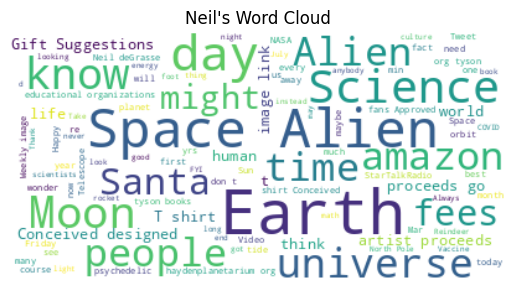

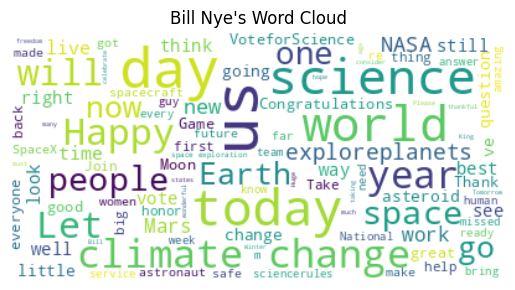

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    stopwords.update(['S','https'])  #cleanign as tweets has 'https' and 'S' in their data a lot
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


plot_wordcloud(" ".join(neiltyson_url['tweet-text']), "Neil's Word Cloud")
print('\n')
plot_wordcloud(" ".join(billnye_url['tweet-text']), "Bill Nye's Word Cloud")

#### Theme:

Neil: Frequent use of cosmic terms like "space" (38), "moon" (25), and "aliens" (23) reflects his focus on astronomy and speculative science.
Space exploration, cosmic phenomena, astronomy

Bill: Dominance of action-oriented terms like "change" (33), "climate" (24), and "today" (28) highlights his emphasis on current environmental issues.
Climate change advocacy, daily science education, environmental action

#### Differences:

from word counter and wordcloud it is clear that Neil has his primary focus in Cosmic exploration and theoretical science for Astronomy enthusiasts with Neutral/reflective tone

Bill has his primaruy focus in Climate action and practical science for Environmental activists and educators with Urgent/optimistic to_numeric

#### Similarities:

from word counter and wordcloud it is clear that Both use "science" prominently (Neil: 20, Bill: 25), reinforcing their roles as science communicators.
Shared interest in "space" (Neil: 38, Bill: 21), though with different angles (cosmic vs. planetary).
Positive sentiment overall, aligning with their goal to inspire interest in science.

#### Conclusion:

Neil leans into cosmic curiosity with neutral/reflective tones, appealing to astronomy enthusiasts.
Bill prioritizes climate action with urgent, positive messaging to mobilize environmental advocacy.
Both succeed as science educators but cater to distinct audiences through thematic and linguistic choices.

### Q3. Try building an LDA topic model using the from the accounts. What’s the best topic set that seems to capture the different things these accounts discuss? How do the topics compare across the users? How did you process the text? What parameters did you use? (4 P)

In [ ]:
#Checking the column names

beaverton_data = pd.read_excel(beaverton_url)
beaverton_data.head()

,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,Heartwarming: This man reconnected with his mo...,The Beaverton,2022-03-05
1,2,OP-ED: Big Pharma put all of the chips in the ...,The Beaverton,2022-03-04
2,3,Make every day a 'talking to Americans about t...,The Beaverton,2022-03-04
3,4,Single drop of sweat falls down local dad’s fa...,The Beaverton,2022-03-04
4,5,100% of Canadians pretty sure they’ve had COVI...,The Beaverton,2022-03-03


In [ ]:
billnye_data=pd.read_excel("https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N")
neiltyson_data=pd.read_excel('https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM')


In [ ]:
georgetakei_data = pd.read_excel(georgetakei_url)

In [ ]:
cookiemonster_data = pd.read_excel(cookiemonster_url)

In [ ]:
stephenking_data = pd.read_excel(stephenking_url)

In [ ]:
twentytwo_minutes_data = pd.read_excel(twentytwo_minutes_url)

In [ ]:
tweets_df = pd.concat([beaverton_data, billnye_data, georgetakei_data, cookiemonster_data, neiltyson_data, stephenking_data, twentytwo_minutes_data], ignore_index=True)
tweets_df.head()

,tweet-id,tweet-text,tweet-author,tweet-timestamp-date
0,1,Heartwarming: This man reconnected with his mo...,The Beaverton,2022-03-05 00:00:00
1,2,OP-ED: Big Pharma put all of the chips in the ...,The Beaverton,2022-03-04 00:00:00
2,3,Make every day a 'talking to Americans about t...,The Beaverton,2022-03-04 00:00:00
3,4,Single drop of sweat falls down local dad’s fa...,The Beaverton,2022-03-04 00:00:00
4,5,100% of Canadians pretty sure they’ve had COVI...,The Beaverton,2022-03-03 00:00:00


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import spacy
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# To perform tokenization and lemmatization through Spacy

def tokenize(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens


In [ ]:
tweets_df['tokens'] = tweets_df['tweet-text'].apply(tokenize)
print(tweets_df[['tweet-text', 'tokens']].head())

                                          tweet-text  \
0  Heartwarming: This man reconnected with his mo...   
1  OP-ED: Big Pharma put all of the chips in the ...   
2  Make every day a 'talking to Americans about t...   
3  Single drop of sweat falls down local dad’s fa...   
4  100% of Canadians pretty sure they’ve had COVI...   

                                              tokens  
0   [heartwarming, man, reconnecte, mom, ask, taxis]  
1               [op, ed, big, pharma, chip, vaccine]  
2  [day, talk, americans, healthcare, system, lev...  
3  [single, drop, sweat, fall, local, dad, face, ...  
4                    [canadian, pretty, sure, covid]  


In [ ]:
# Lemmatization through NLTK library
def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

tweets_df['lemmas'] = tweets_df['tokens'].apply(lemmatize)
print(tweets_df[['tweet-text', 'tokens', 'lemmas']].head())

                                          tweet-text  \
0  Heartwarming: This man reconnected with his mo...   
1  OP-ED: Big Pharma put all of the chips in the ...   
2  Make every day a 'talking to Americans about t...   
3  Single drop of sweat falls down local dad’s fa...   
4  100% of Canadians pretty sure they’ve had COVI...   

                                              tokens  \
0   [heartwarming, man, reconnecte, mom, ask, taxis]   
1               [op, ed, big, pharma, chip, vaccine]   
2  [day, talk, americans, healthcare, system, lev...   
3  [single, drop, sweat, fall, local, dad, face, ...   
4                    [canadian, pretty, sure, covid]   

                                              lemmas  
0    [heartwarming, man, reconnecte, mom, ask, taxi]  
1               [op, ed, big, pharma, chip, vaccine]  
2  [day, talk, american, healthcare, system, leve...  
3  [single, drop, sweat, fall, local, dad, face, ...  
4                    [canadian, pretty, sure, covid

In [ ]:
twentytwo_minutes_data['tokens'] = twentytwo_minutes_data['tweet-text'].apply(tokenize)
twentytwo_minutes_data['lemmas'] = twentytwo_minutes_data['tokens'].apply(lemmatize)

beaverton_data['tokens'] = beaverton_data['tweet-text'].apply(tokenize)
beaverton_data['lemmas'] = beaverton_data['tokens'].apply(lemmatize)

stephenking_data['tokens'] = stephenking_data['tweet-text'].apply(tokenize)
stephenking_data['lemmas'] = stephenking_data['tokens'].apply(lemmatize)


In [ ]:
import gensim.corpora as corpora

# Create dictionary and corpus
id2word = corpora.Dictionary(tweets_df['lemmas'])
texts = tweets_df['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
tweets_df.head()

,tweet-id,tweet-text,tweet-author,tweet-timestamp-date,tokens,lemmas
0,1,Heartwarming: This man reconnected with his mo...,The Beaverton,2022-03-05 00:00:00,"[heartwarming, man, reconnecte, mom, ask, taxis]","[heartwarming, man, reconnecte, mom, ask, taxi]"
1,2,OP-ED: Big Pharma put all of the chips in the ...,The Beaverton,2022-03-04 00:00:00,"[op, ed, big, pharma, chip, vaccine]","[op, ed, big, pharma, chip, vaccine]"
2,3,Make every day a 'talking to Americans about t...,The Beaverton,2022-03-04 00:00:00,"[day, talk, americans, healthcare, system, lev...","[day, talk, american, healthcare, system, leve..."
3,4,Single drop of sweat falls down local dad’s fa...,The Beaverton,2022-03-04 00:00:00,"[single, drop, sweat, fall, local, dad, face, ...","[single, drop, sweat, fall, local, dad, face, ..."
4,5,100% of Canadians pretty sure they’ve had COVI...,The Beaverton,2022-03-03 00:00:00,"[canadian, pretty, sure, covid]","[canadian, pretty, sure, covid]"


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=20,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=100,
                                            alpha='auto',
                                            per_word_topics=True)

In [ ]:
lda_model.show_topics()

[(10,
  '0.036*"sense" + 0.022*"experience" + 0.013*"art" + 0.000*"alien" + 0.000*"hearing" + 0.000*"note" + 0.000*"hollywood" + 0.000*"sight" + 0.000*"space" + 0.000*"smell"'),
 (7,
  '0.059*"study" + 0.047*"child" + 0.042*"cat" + 0.013*"self" + 0.006*"consecutive" + 0.006*"valentine" + 0.005*"toy" + 0.000*"movement" + 0.000*"harris" + 0.000*"show"'),
 (4,
  '0.049*"close" + 0.034*"fire" + 0.027*"discover" + 0.025*"local" + 0.018*"internet" + 0.011*"sad" + 0.009*"refuse" + 0.007*"tab" + 0.007*"pull" + 0.006*"alarm"'),
 (8,
  '0.058*"city" + 0.050*"vaccine" + 0.034*"head" + 0.033*"country" + 0.031*"street" + 0.027*"stuff" + 0.010*"bunch" + 0.000*"sesame" + 0.000*"fun" + 0.000*"rank"'),
 (5,
  '0.194*"say" + 0.061*"leave" + 0.027*"snow" + 0.014*"law" + 0.013*"fake" + 0.008*"lie" + 0.004*"monument" + 0.000*"moon" + 0.000*"ontario" + 0.000*"spot"'),
 (1,
  '0.152*"time" + 0.125*"think" + 0.096*"people" + 0.039*"food" + 0.036*"bad" + 0.034*"scientist" + 0.030*"actually" + 0.016*"place" + 0

In [ ]:
# Print the topics
topics = lda_model.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.139*"year" + 0.129*"like" + 0.117*"eat" + 0.087*"celebrate" + 0.084*"day" + 0.072*"new" + 0.045*"look" + 0.043*"go" + 0.034*"thing" + 0.018*"take" + 0.009*"end" + 0.007*"room" + 0.006*"stand" + 0.005*"expert" + 0.004*"ride" + 0.004*"consider" + 0.004*"hot" + 0.003*"living" + 0.003*"bite" + 0.003*"market"')
(1, '0.152*"time" + 0.125*"think" + 0.096*"people" + 0.039*"food" + 0.036*"bad" + 0.034*"scientist" + 0.030*"actually" + 0.016*"place" + 0.014*"announce" + 0.013*"travel" + 0.011*"different" + 0.006*"invent" + 0.000*"cookie" + 0.000*"earth" + 0.000*"world" + 0.000*"space" + 0.000*"today" + 0.000*"alien" + 0.000*"pandemic" + 0.000*"shortage"')
(2, '0.186*"report" + 0.034*"try" + 0.034*"shirt" + 0.028*"fight" + 0.025*"line" + 0.023*"american" + 0.023*"cdnpoli" + 0.022*"company" + 0.021*"talk" + 0.020*"delicious" + 0.018*"system" + 0.018*"test" + 0.018*"money" + 0.017*"kill" + 0.016*"ice" + 0.016*"warm" + 0.014*"gas" + 0.011*"require" + 0.011*"cream" + 0.007*"special"')
(3, '0.08

In [ ]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_df['lemmas'], dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -16.603500985101633


The coherence Score is -16.6035. This score suggest that the documents are sparsers and the words cooccur less frequently.

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
#Model for combination of tweet authors with 20 topics

dictionary = corpora.Dictionary(tweets_df['lemmas'])
gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.407851  0.014558       1        1  19.342164
13    -0.002994  0.062414       2        1   8.071839
9     -0.017643  0.018715       3        1   7.185203
1     -0.014021  0.019569       4        1   7.031073
11     0.003361 -0.296698       5        1   7.018163
2     -0.013164  0.022735       6        1   6.580251
19    -0.022471  0.015723       7        1   5.806966
18    -0.015702  0.018475       8        1   5.773043
16    -0.020802  0.015426       9        1   4.851807
14    -0.016345  0.018165      10        1   4.791477
12    -0.024091  0.013601      11        1   4.116283
17    -0.028399  0.010957      12        1   3.762867
6     -0.028324  0.011557      13        1   3.724402
3     -0.028755  0.011042      14        1   3.228203
5     -0.029723  0.009236      15        1   2.240070
15    -0.030062  0.008330      16        1   2.186266
8     -0.030137  0.007766      17        1   1.559758
4     -0.030003  0.006889      18        1   1.349261
7     -0.029849  0.006640      19        1   1.084413
10    -0.028729  0.004899      20        1   0.296490, topic_info=       Term        Freq       Total Category  logprob  loglift
330    know  162.000000  162.000000  Default  30.0000  30.0000
260    year  320.000000  320.000000  Default  29.0000  29.0000
351   right  197.000000  197.000000  Default  28.0000  28.0000
341    like  297.000000  297.000000  Default  27.0000  27.0000
339     eat  269.000000  269.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
606   alien    0.008486    1.307359  Topic20  -8.3312   0.7835
680   space    0.008486    1.307477  Topic20  -8.3312   0.7834
576   break    0.008485    1.306665  Topic20  -8.3313   0.7840
761   earth    0.008485    1.307408  Topic20  -8.3312   0.7834
825  little    0.008485    1.306856  Topic20  -8.3313   0.7838

[813 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
432       6  0.778774  accidentally
118      10  0.688655           act
462       4  0.946408      actually
217       2  0.887456           add
446       5  0.990910           air
...     ...       ...           ...
32       12  0.855148        worker
505       3  0.943945         wrong
260       1  0.994915          year
481       2  0.857031          york
559      16  0.815907          zoom

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 14, 10, 2, 12, 3, 20, 19, 17, 15, 13, 18, 7, 4, 6, 16, 9, 5, 8, 11])

In [ ]:
# The LDA model for the tweet author 22Minutes with  5 topics
all_lemmas = twentytwo_minutes_data['lemmas'].tolist()
original_dictionary = corpora.Dictionary(all_lemmas)

full_corpus = [original_dictionary.doc2bow(text) for text in all_lemmas]

lda_model = gensim.models.ldamodel.LdaModel(corpus=full_corpus,
                                            id2word=original_dictionary,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=100,
                                            alpha='auto',
                                            per_word_topics=True)

dictionary = corpora.Dictionary(twentytwo_minutes_data['lemmas'])
gensimvis.prepare(lda_model, full_corpus, original_dictionary)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.062935  0.089941       1        1  24.381866
1      0.050552 -0.144774       2        1  21.343143
2      0.053881  0.039520       3        1  19.998928
3     -0.156392  0.002084       4        1  18.611570
0     -0.010977  0.013229       5        1  15.664492, topic_info=     Term       Freq      Total Category  logprob  loglift
43    new  28.000000  28.000000  Default  30.0000  30.0000
194   old  10.000000  10.000000  Default  29.0000  29.0000
88   call   6.000000   6.000000  Default  28.0000  28.0000
121  year  18.000000  18.000000  Default  27.0000  27.0000
230   big   5.000000   5.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
10     go   1.435799  10.259374   Topic5  -5.6177  -0.1127
269  take   1.351867   3.727833   Topic5  -5.6779   0.8394
194   old   1.332478  10.954702   Topic5  -5.6924  -0.2530
5    week   1.325956   7.121276   Topic5  -5.6973   0.1728
80   like   1.324076  13.132444   Topic5  -5.6987  -0.4406

[284 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1022      2  0.973703    admit
340       5  0.538709      age
1195      4  0.502048  airport
76        4  0.519794    alert
134       5  0.538724    allow
...     ...       ...      ...
121       1  0.582381     year
121       3  0.052944     year
121       4  0.105887     year
121       5  0.211775     year
650       5  0.538724      zoo

[345 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [ ]:
# The LDA model for the tweet author The Beaverton with 5 topics
all_lemmas = beaverton_data['lemmas'].tolist()
original_dictionary = corpora.Dictionary(all_lemmas)

full_corpus = [original_dictionary.doc2bow(text) for text in all_lemmas]

lda_model = gensim.models.ldamodel.LdaModel(corpus=full_corpus,
                                            id2word=original_dictionary,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=100,
                                            alpha='auto',
                                            per_word_topics=True)


dictionary = corpora.Dictionary(beaverton_data['lemmas'])
gensimvis.prepare(lda_model, full_corpus, original_dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.001778 -0.060693       1        1  23.295688
3     -0.049978  0.155158       2        1  22.030440
1     -0.107602 -0.080097       3        1  21.285590
0      0.149951 -0.005954       4        1  16.876557
4      0.009408 -0.008415       5        1  16.511725, topic_info=          Term      Freq     Total Category  logprob  loglift
2          man  9.000000  9.000000  Default  30.0000  30.0000
33    canadian  7.000000  7.000000  Default  29.0000  29.0000
66     climate  5.000000  5.000000  Default  28.0000  28.0000
76   scientist  6.000000  6.000000  Default  27.0000  27.0000
183     report  6.000000  6.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
76   scientist  2.218328  6.147599   Topic5  -4.2298   0.7818
183     report  1.165262  6.507119   Topic5  -4.8736   0.0811
13         day  0.812523  3.301168   Topic5  -5.2341   0.3992
72         bad  0.812523  3.828326   Topic5  -5.2341   0.2511
23        drop  0.466224  1.293453   Topic5  -5.7896   0.7807

[202 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
462       1  0.233091  actually
462       4  0.699274  actually
575       4  0.979737        ad
633       5  0.849367  alarming
606       4  0.979737     alien
...     ...       ...       ...
419       2  0.869956    wonder
298       1  0.981383      work
620       2  0.826233       yam
638       5  0.849367       yay
578       4  0.979737   youtube

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1, 5])

In [ ]:
# The LDA model for the tweet author  Stephenking with 5 topics

all_lemmas = stephenking_data['lemmas'].tolist()
original_dictionary = corpora.Dictionary(all_lemmas)

full_corpus = [original_dictionary.doc2bow(text) for text in all_lemmas]

lda_model = gensim.models.ldamodel.LdaModel(corpus=full_corpus,
                                            id2word=original_dictionary,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=100,
                                            alpha='auto',
                                            per_word_topics=True)

dictionary = corpora.Dictionary(twentytwo_minutes_data['lemmas'])
gensimvis.prepare(lda_model, full_corpus, original_dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.074120  0.143169       1        1  27.437814
4     -0.112626 -0.074180       2        1  24.024529
3      0.142789  0.031425       3        1  17.167370
1      0.024848 -0.054247       4        1  16.471101
0      0.019109 -0.046167       5        1  14.899186, topic_info=        Term       Freq      Total Category  logprob  loglift
12      evil  11.000000  11.000000  Default  30.0000  30.0000
17     molly  11.000000  11.000000  Default  29.0000  29.0000
10       aka   8.000000   8.000000  Default  28.0000  28.0000
40     right   6.000000   6.000000  Default  27.0000  27.0000
21     thing  10.000000  10.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
123       go   2.552417   5.912254   Topic5  -4.2779   1.0639
654  theater   1.504240   3.458853   Topic5  -4.8067   1.0712
52      like   1.862287   4.716816   Topic5  -4.5932   0.9745
200    movie   1.504240   5.641012   Topic5  -4.8067   0.5821
91       old   0.814111   2.885555   Topic5  -5.4206   0.6385

[222 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
724       5  0.995202    academy
83        1  0.353935     actual
83        5  0.707871     actual
682       3  0.541677     airpod
10        1  0.938289        aka
...     ...       ...        ...
9         3  0.456007      write
353       3  0.452356      wrong
666       2  0.918652         ya
555       2  0.914578         yo
667       2  0.918652  zeitgeist

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 1])

In [ ]:
# Build LDA model for entire tweet with 6 topics
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=100,
                                            alpha='auto',
                                            per_word_topics=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The LDA model can be customized for each tweet author by filtering the tweets for that particular author.

In [ ]:
dictionary = corpora.Dictionary(tweets_df['lemmas'])
gensimvis.prepare(lda_model2, corpus, dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.271509 -0.108544       1        1  22.386842
2     -0.012013  0.258532       2        1  16.879900
5     -0.196498 -0.164819       3        1  16.428596
3     -0.055862 -0.003875       4        1  15.975865
1      0.007635  0.011142       5        1  14.341624
4     -0.014770  0.007565       6        1  13.987173, topic_info=        Term        Freq       Total Category  logprob  loglift
1752  cookie  101.000000  101.000000  Default  30.0000  30.0000
260     year  115.000000  115.000000  Default  29.0000  29.0000
341     like  107.000000  107.000000  Default  28.0000  28.0000
330     know   81.000000   81.000000  Default  27.0000  27.0000
339      eat   97.000000   97.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
86      take    7.897161   16.128319   Topic6  -5.3492   1.2530
228      try    7.475184   12.397902   Topic6  -5.4041   1.4611
1756      da    8.031311   27.902247   Topic6  -5.3323   0.7217
101     life    7.519286   20.247039   Topic6  -5.3982   0.9765
706    world    7.698293   38.122913   Topic6  -5.3747   0.3672

[252 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
462       4  0.793865  actually
462       6  0.176414  actually
446       3  0.988485       air
1422      5  0.888928     alert
606       6  0.994899     alien
...     ...       ...       ...
706       6  0.209848     world
505       6  0.898409     wrong
260       1  0.993476      year
970       5  0.871080     young
2414      5  0.960611        yr

[235 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 6, 4, 2, 5])

Given your results, 5 topics seem to provide clearer distinctions with minimal overlap, making it easier to interpret. With 20 topics, the model likely overfits, causing redundancy and blending between themes.

Comparison Across Users:

- Some accounts might focus more on finance and politics, while others are tech-driven.
- Certain users may have mixed discussions, bridging topics like tech & economy.
- Overlapping words in the 20-topic model suggest redundant or less meaningful themes.

Since num_topics=5 provides distinct separation, it’s likely the better fit for your dataset


Before feeding the data into the model, the text was processed as follows:

- Tokenization : Splitting the tweets into individual words
- Lemmatization : Converting the words to their base forms
- Stopword Removal : Removing the common words
- Lowercasing : Ensuring the case consistency
- Removing punctuations & Special Characters

The parameters used in the LDA Model:

- Corpus - Stream of document vector
- id2word - Mapping from word IDs to words.
- num_topics = 20/5 - Initial num of topics
- random_state - to produce reproducability
- updates_every = 1 - model updates after each pass
- chunksize = 100 - Processes 100 documents at a time
- passes = 100 - High no. of passes for better convergence
- alpha = 'auto' - automatically update document-topic distribution
- per_word_topic = True - Tracks word assignments to topics

In [ ]:
# these URLS are used again, so putting them here for repurpose

beaverton_url = 'https://drive.google.com/uc?export=download&id=173t6vMYcbSED81IOmg0MbhHsrSFSiF21'
billnye_url = 'https://drive.google.com/uc?export=download&id=1w1Xm-TQfcPfGICM_8_LQiWSqzf8WUk8N'
georgetakei_url = 'https://drive.google.com/uc?export=download&id=1_Ck9S2aW9cBQQrqoTiNLRmvRu4WvPn8y'
cookiemonster_url = 'https://drive.google.com/uc?export=download&id=10Av-HVklZA4Su3TcvSpxU6nS8At9mJ05'
neiltyson_url = 'https://drive.google.com/uc?export=download&id=1GSKxxldXe--HE4gSYAEn2ip2vS4bXKMM'
stephenking_url = 'https://drive.google.com/uc?export=download&id=1Oq2pUCv0d7x4tDKX1E-3hgdSAuXcZtVU'
twentytwo_minutes_url = 'https://drive.google.com/uc?export=download&id=1B2zwAJYdw_9skXAFbn7QIs6uyIikje5W'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2>Guiding Question #4:</h2>
<h3>a) How many times does each account mention/refer themselves and how does this compare across the accounts?</h3>

In order to answer this question, we analyzed the number of tweets that contained at least one word that was used to refer to onself, i.e. self words. The words that we considered as ``self-words`` were:

<ul>
<li>"I"</li>
<li>"Me"</li>
<li>"Myself"</li>
<li>"Mine"</li>
</ul>

However, to avoid misinterpretation of these results and understanding the differences between frequency vs. density (i.e. an account could have many tweets with self-words, but if these words make up a small fraction of its total text, its overall self-referential tone may be lower than it initially appears), we will also analyze the total number of self-words used by the tweets and compare it to the total number of words tweeted.

Overall, analyzing both tweet count and word-level proportions ensures that we capture both how often and how intensely self-words are used. This helps us build a more nuanced understanding of an account’s communication patterns.

<h3>b) Are the tweets that contain <b>self-words</b> positive or negative? And how does this compare between accounts?</h3>

We answered this question by using the sentiment analyzer. We found the average sentiment compound score of all the tweets that contained self-words and compared them between accounts.

In [ ]:
# read all the data and store it somewhere for ease of access
beaverton_data = pd.read_excel(beaverton_url)
billnye_data = pd.read_excel(billnye_url)
georgetakei_data = pd.read_excel(georgetakei_url)
cookiemonster_data = pd.read_excel(cookiemonster_url)
neiltyson_data = pd.read_excel(neiltyson_url)
stephenking_data = pd.read_excel(stephenking_url)
twentytwo_minutes_data = pd.read_excel(twentytwo_minutes_url)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# create a function that takes a csv file and returns a dictionary containing the following:
# how many tweets mention the self-words
# how many tweets there are in total
# how many self-words are mentioned in all the tweets
# how many words are mentioned in all the tweets

def get_self_words(csv_file, filename):

    # define self words using a set
    SELF_WORDS = {"I", "Me", "Myself", "Mine", "i", "me", "myself", "mine"}

    # initialize the self word count
    self_word_tweet = 0
    total_self_words = 0
    total_tweets = len(csv_file)
    total_word_count = 0

    # go through all the rows --- TOKENIZE
    for i in range(total_tweets):
        # tokenize each tweet
        og_words = nltk.word_tokenize(csv_file["tweet-text"][i])
        # remove punctuation/clean words
        nonPunct = re.compile('.*[A-Za-z].*')
        clean_words = [w for w in og_words if nonPunct.match(w)]
        # add to the total word count
        total_word_count += len(clean_words)
        if any(word in SELF_WORDS for word in clean_words):
            self_word_tweet+= 1
            total_self_words+= sum(1 for word in clean_words if word in SELF_WORDS)

    my_dict = {"Account Name": filename,
               "Tweets with Self Words": self_word_tweet,
               "Total # of Tweets": total_tweets,
               "Total Self Words Count": total_self_words,
               "Total Word Count": total_word_count}

    return my_dict

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# apply the function to all the datasets
beaverton_words = get_self_words(beaverton_data, "Beaverton")
billnye_words = get_self_words(billnye_data, "Bill Nye")
georgeatakei_words = get_self_words(georgetakei_data, "George Takei")
cookiemonster_words = get_self_words(cookiemonster_data, "Cookie Monster")
neiltyson_words = get_self_words(neiltyson_data, "Neil Tyson")
stephenking_words = get_self_words(stephenking_data, "Stephen King")
twentytwo_minutes_words = get_self_words(twentytwo_minutes_data, "Twenty Two Minutes")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# merge the datasets together into a list and convert into a dataframe
all_dicts = [beaverton_words, billnye_words, georgeatakei_words, cookiemonster_words, neiltyson_words, stephenking_words, twentytwo_minutes_words]

df_q4 = pd.DataFrame(all_dicts)

# check the dataframe
df_q4

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Account Name,Tweets with Self Words,Total # of Tweets,Total Self Words Count,Total Word Count
0,Beaverton,5,122,6,1527
1,Bill Nye,42,180,59,4676
2,George Takei,11,65,14,1261
3,Cookie Monster,165,201,342,2964
4,Neil Tyson,58,206,75,5994
5,Stephen King,61,128,95,2656
6,Twenty Two Minutes,3,200,3,5204


In [ ]:
# visualize the data
fig4a = px.bar(df_q4, x='Account Name', y='Tweets with Self Words',
             color='Account Name',
             text_auto=True,
             height= 600,
             width = 800,
             title = "Comparing the Number of Tweets that Contain Self-Words Between Selected Twitter Accounts",
             )

fig4a.update_layout(xaxis={'categoryorder': 'total descending'})
fig4a.update_traces(textposition="outside", cliponaxis=False)
fig4a.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h3>Guiding Question #4: How many times does each account mention/refer themselves and how does this compare across the accounts?</h3>

In order to answer this question, we analyzed the number of tweets that contained at least one word that was used to refer to onself, i.e. self words. The words that we considered as ``self-words`` were:

<ul>
<li>"I"</li>
<li>"Me"</li>
<li>"Myself"</li>
<li>"Mine"</li>
</ul>

-------

Based on the counts from our analysis, the account that had the most tweets that contain self-words was ``Cookie Monster``, and the account with the least amount of tweets containing self-words, was "Twenty Two Minutes".

Based on the bar graph above, we can see that 'personal' accounts contained more tweets that referred to oneself than the 'brand' accounts or accounts that represent a group or organizaton.

These 'brand' accounts that represent a group/organization seldom write tweets using any of the 'self-words', with Beaverton only tweeting 5 tweets with self-words, and Twenty Two Minutes tweeting 3 tweets.

These observations are reflective of the types of accounts these are. As expected, personal accounts would use more self-words, and 'brand' accounts would use less self-referential words because these accounts focused on delivering content, such as news, satire or comedy.

In [ ]:
# Create new columns for proportions
df_q4["Tweets without Self Words"] = df_q4["Total # of Tweets"] - df_q4["Tweets with Self Words"]

# Convert counts to proportions
df_q4["Proportion of Tweets with Self Words"] = df_q4["Tweets with Self Words"] / df_q4["Total # of Tweets"]
df_q4["Proportion of Tweets without Self Words"] = df_q4["Tweets without Self Words"] / df_q4["Total # of Tweets"]

fig4b = px.bar(df_q4,
               x="Account Name",
               y=["Proportion of Tweets with Self Words", "Proportion of Tweets without Self Words"],
               title="Proportion of Tweets with Self Words Across Accounts",
               text_auto=True,
               height= 600,
               width = 800,
               barmode="stack")

fig4b.update_traces(textposition="inside", cliponaxis=False)
fig4b.update_xaxes(title_text='Account Name')
fig4b.update_yaxes(title_text='Proportion of Tweets', tickformat=".0%")
fig4b.update_layout(legend_title_text="Tweet Type")

fig4b.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



-----

We also wanted to determine the proportion of tweets that contained self-referential words or mentioned oneself relative to the total number of tweets posted. We used a stacked bar chart to represent this.

As you can see, the 'Cookie Monster' account had the largest proportion of tweets that mentioned oneself relative to the total number of tweets they posted. The other accounts do not mention themselves as much as the 'Cookie Monster' account, with Stephen King's proportion only coming to a high of 48% of his tweets, which is still 34% less than the 'Cookie Monster' account.

-----

In [ ]:
# Create new columns for proportions
df_q4["Non-Self Words"] = df_q4["Total Word Count"] - df_q4["Total Self Words Count"]


df_q4["Proportion of Self Words"] = df_q4["Total Self Words Count"] / df_q4["Total Word Count"]
df_q4["Proportion without Self Words"] = df_q4["Non-Self Words"] / df_q4["Total Word Count"]

fig4c = px.bar(df_q4,
               x="Account Name",
               y=["Proportion of Self Words", "Proportion without Self Words"],
               title="Proportion of Self Words Compared to Total Number of Words Across Accounts",
               text_auto=True,
               height= 600,
               width = 800,
               barmode="stack")

fig4c.update_traces(textposition="inside", cliponaxis=False)
fig4c.update_xaxes(title_text='Account Name')
fig4c.update_yaxes(title_text='Proportion of Tweets', tickformat=".0%")
fig4c.update_layout(legend_title_text="Tweet Type")

fig4c.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



-----

We also wanted to examine if what the proportion of self words relative to the total number of words tweeted by each account. We wanted to observe if there was a case of an account using a lot of self-words, but in less tweets.  

While many tweets were contained self-words, they only made up a small percentage of total words used. In fact, the account with the most self-words only made up 12% of the total words used by that account (the Cookie Monster account). As you can see, the 'Cookie Monster' account still has the highest percentage (12%) of using self-words compared to the other accounts, followed by Stephen King at 4%.

Although we used two stacked bar charts to reflect two different ideas, that may seem similar or yield similar results. It is important to observe how many times a self-words were used overall by each account because it helps us determine whether some accounts frequently use self-words but across fewer tweets, providing us a deeper insight into self-referential language patterns across accounts.

----

In [ ]:
sia = SentimentIntensityAnalyzer()

# create a function to tokenize and get the sentiment for the tweets that contain the self-words

def get_self_sentiment(csv_file):

    # define self words using a set
    SELF_WORDS = {"I", "Me", "Myself", "Mine", "i", "me", "myself", "mine"}

    sents_list = []

    for i in range(len(csv_file)):
        # clean the words in the file
        og_words = nltk.word_tokenize(csv_file["tweet-text"][i])
        nonPunct = re.compile('.*[A-Za-z].*')
        clean_words = [w for w in og_words if nonPunct.match(w)]

        # check if there are any self words in the sentence, and then check sentiment
        if any(word in SELF_WORDS for word in clean_words):
            heh = sia.polarity_scores(csv_file["tweet-text"][i])
            # add sentence to a list
            sents_list.append(heh)

    the_df = pd.DataFrame(sents_list)
    return the_df["compound"].mean()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
beaverton_sent = {"Account" : "Beaverton", "Sentiment Score": get_self_sentiment(beaverton_data)}
billnye_sent = {"Account": "Bill Nye", "Sentiment Score": get_self_sentiment(billnye_data)}
georgetakei_sent = {"Account": "George Takei", "Sentiment Score": get_self_sentiment(georgetakei_data)}
cookiemonster_sent = {"Account": "Cookie Monster", "Sentiment Score": get_self_sentiment(cookiemonster_data)}
neiltyson_sent = {"Account": "Neil deGrasse Tyson", "Sentiment Score": get_self_sentiment(neiltyson_data)}
stephenking_sent = {"Account": "Stephen King", "Sentiment Score": get_self_sentiment(stephenking_data)}
twentytwo_minutes_sent = {"Account": "22 Minutes", "Sentiment Score": get_self_sentiment(twentytwo_minutes_data)}

account_self_sentiments = pd.DataFrame([beaverton_sent, billnye_sent, georgetakei_sent, cookiemonster_sent, neiltyson_sent, stephenking_sent, twentytwo_minutes_sent])

account_self_sentiments

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Account,Sentiment Score
0,Beaverton,0.220060
1,Bill Nye,0.426419
2,George Takei,0.168127
3,Cookie Monster,0.293248
4,Neil deGrasse Tyson,0.275803
5,Stephen King,0.089551
6,22 Minutes,-0.008500


In [ ]:
fig4d = px.bar(account_self_sentiments, x='Account', y='Sentiment Score',
             color='Account',
             text_auto=True,
             height= 600,
             width = 800,
             title = "Comparing the Sentiment Score of Tweets that Contain Self-Words Between Selected Twitter Accounts",
             )

fig4d.update_layout(xaxis={'categoryorder': 'total descending'})
fig4d.update_traces(textposition="outside", cliponaxis=False)
fig4d.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<h3>b) Are the tweets that contain <b>self-words</b> positive or negative? And how does this compare between accounts?</h3>

We answered this question by using the sentiment analyzer. We found the average sentiment compound score of all the tweets that contained self-words and compared them between accounts. We called this average the 'sentiment score' in our dataframe. Scores closer to one meant a more positive sentiment and scores closer to -1 showed a more negative sentiment.

----

Based on our chart above, compound/sentiment score for the accounts were not extremely positive, barely reaching over the score of 0.5. Interestingly, the 'Cookie Monster' account did not have the highest sentiment score even though it had the most tweets containing self-words.

We can also see that the accounts that had tweets containing self-words were mostly positive, except for the '22 Minutes' account, which was the only account that had the only negative compound/sentiment score from the sentiment analyzer. Even thought the '22 Minutes' account did not have a positive score, one would say it was a pretty neutral score because it was -0.0085, very close to 0.

The '22 Minutes' and 'Beaverton' accounts, were 'brand' accounts (an account representing a group/organization), however, the 'Beaverton' account was noticeably more positive than the '22 Minutes' account, ranking 4th out of 7 of the accounts. This is possibly due to the theme of the 'Beaverton' account, which is comedy and satire.

Finally, we observed that the 'Bill Nye' account had the most positive sentiment score for their tweets containing self-words, compared to the other accounts.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

